In [17]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import numpy as np
import pandas as pd

from pathlib import Path
import glob

import h5py
import flammkuchen as fl
import seaborn as sns
from matplotlib.cm import ScalarMappable
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pywt
import os

In [19]:
from sklearn.neighbors import NearestNeighbors

from nilearn.connectome import ConnectivityMeasure
from sklearn.manifold import SpectralEmbedding

from mpl_toolkits import mplot3d
# %matplotlib widget

In [20]:
catname = np.array(['AS', 'S1', 'S2', 'BS', 'JT', 'HAT', 'RT', 'SAT',
       'OB', 'LLC', 'SLC'])

## Load data

In [21]:
current_results_path = Path(r'\\portulab.synology.me\data\Kata\Figures_Paper\Figure_3\fig_3')
current_results_path = Path(r'\\portulab.synology.me\data\Kata\Figures_Paper\Figure_3\supp\suppl_6')

In [22]:
master_path = Path(r'\\portulab.synology.me\data\Kata\Processed_Data\tensor_data')

tensor =fl.load(master_path/ 'tensors'/ 'tensor_ipsi_contra_pos.h5')

features = pd.read_csv(master_path/ 'features_bouts_new.csv')
df_features = pd.read_csv(master_path /'heatmap_features.csv')

tail = tensor[:, 0]
ipsi_fin = tensor[:,1]
contra_fin = tensor[:,2]

In [23]:
results_path = master_path / 'Embeddings'
matrix_fins_cov = fl.load(results_path/ 'matrix_fins_cov.h5')
X_transformed = fl.load(results_path/ 'fin_cov_embeddings.h5')

In [24]:
tail = tensor[:, 0]
fin_1 = tensor[:,1]
fin_2 = tensor[:,2]

In [25]:
fin_all = np.concatenate((fin_1 ,fin_2),axis=-1)

### Base Figure

In [26]:
alph=0.03
dot_size=1
cm = 1/2.54  # centimeters in inches
f_size = 15
dpi=600

# Panel E

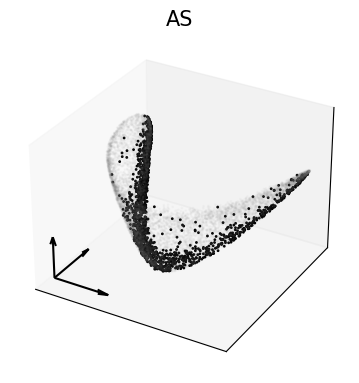

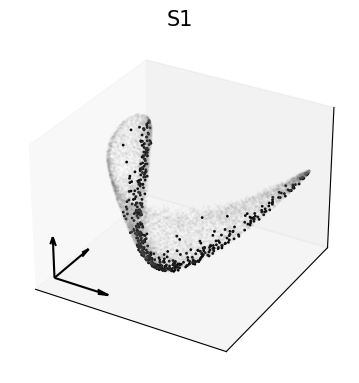

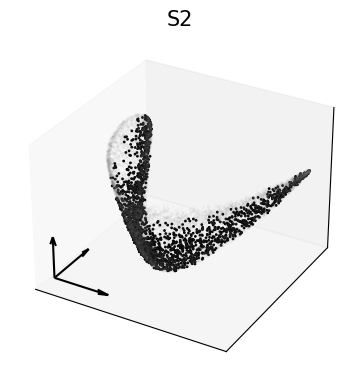

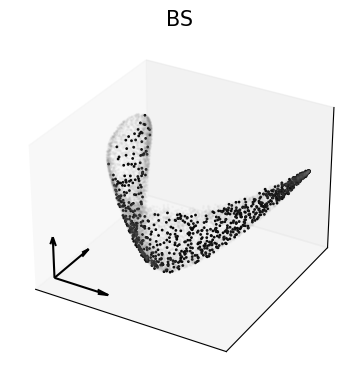

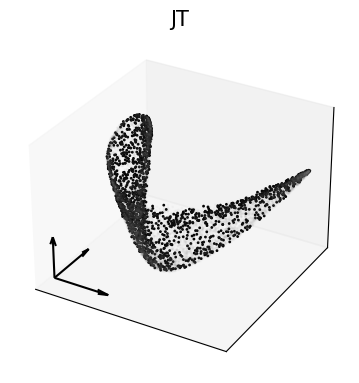

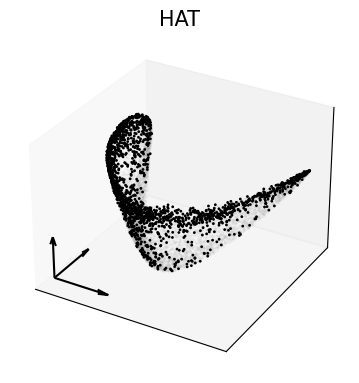

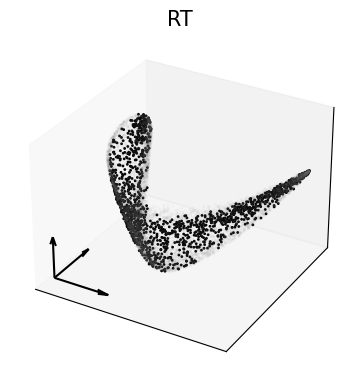

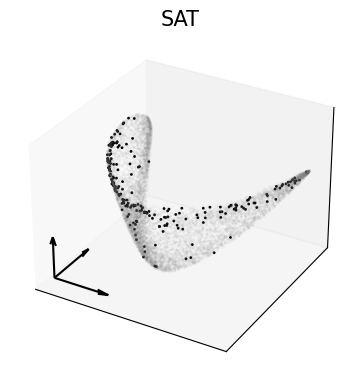

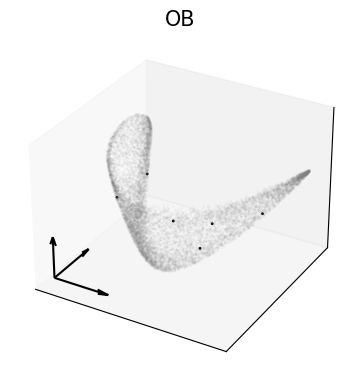

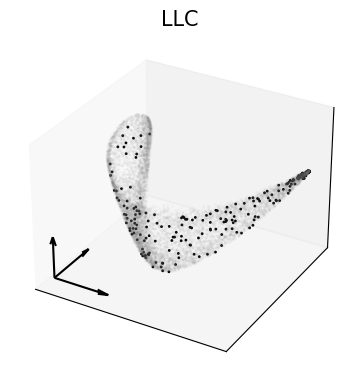

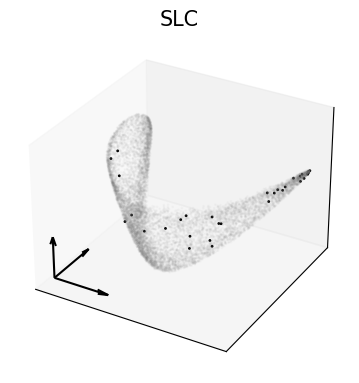

In [27]:

for i in range(11):
    fig = plt.figure(figsize=(10*cm, 10*cm))
    ax = fig.add_subplot(projection='3d')
    fig.patch.set_facecolor('none')
    
    ax.scatter(X_transformed[:,0],X_transformed[:,1],X_transformed[:,2], alpha=alph, s=dot_size, color = 'gray')
    ins = np.squeeze(np.argwhere(features.cluster.values == i))
    ax.scatter(X_transformed[ins,0],X_transformed[ins,1],X_transformed[ins,2], alpha=1, s=dot_size, color ='k')# color[i])
    plt.title(catname[i],color = 'k', fontsize=f_size)
    
    # Origin for the basis
    origin = np.array([0, 0, 0])
    # Define the 3 basis vectors (unit vectors along x, y, z axes)
    u = np.array([1, 0, 0])  # x-axis unit vector
    v = np.array([0, 1, 0])  # y-axis unit vector
    w = np.array([0, 0, 1])  # z-axis unit vector
    
    # Plot the vectors using quiver
    ax.quiver(*origin, *u/3, color='k', label='x-axis (i)', arrow_length_ratio=0.2)
    ax.quiver(*origin, *v/3, color='k', label='y-axis (j)', arrow_length_ratio=0.2)
    ax.quiver(*origin, *w/3, color='k', label='z-axis (k)', arrow_length_ratio=0.2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    plt.tight_layout()
    
    fig.savefig('{}/{}_3DEMB_boutCode.png'.format(current_results_path, catname[i]), format='png', dpi=dpi)